In [1]:
library(TTR)

In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
file_name = "../data-20241108/Apple-revenue-1992-2023.csv"

In [4]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,Year,Revenue
,<int>,<dbl>
1,1992,7.09
2,1993,7.98
3,1994,9.19
4,1995,11.06
5,1996,9.83
6,1997,7.08


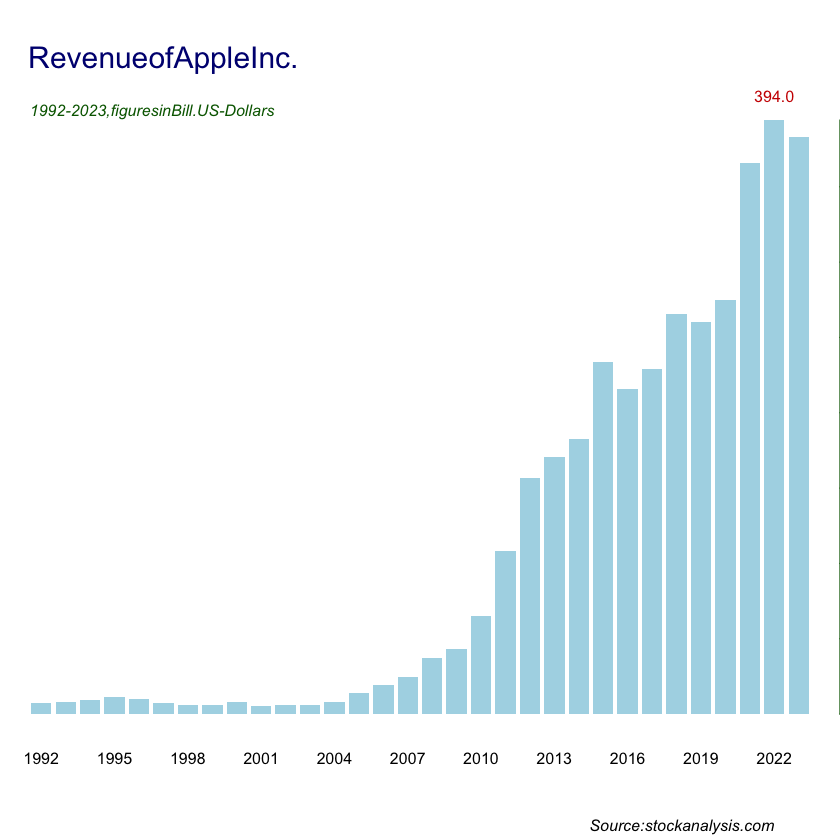

In [5]:
par(pin=c(7, 5))
myplot <- barplot ( df$Revenue , border = NA , col = 'lightblue' ,
names.arg = df$Year , axes = FALSE , cex.names = 0.8 )
abline( h=c(50,100,150,200,250,300,350),col=par("bg"), lwd=1.5)
axis(4,at=seq(0,400,by=50),col='darkgreen')
ind_max<-which.max(df$Revenue)
text(myplot[ind_max],df$Revenue[ind_max]+0.04*df$Revenue[ind_max],
format(round(df$Revenue[ind_max]),nsmall=1),
adj=0.5,xpd=T,col="red3",cex=0.8)
mtext("RevenueofAppleInc.",side=3,line=-3,
adj=0.05,outer=T,cex=1.5,col='navy')
mtext("1992-2023,figuresinBill.US-Dollars",side=3,line=-5,
adj=0.05,cex=0.8,font=3,outer=TRUE,col='darkgreen')
mtext("Source:stockanalysis.com",side=1,line=-1.2,adj=0.9,cex=0.8,font=3,outer=T)

In [6]:
df$change_rate <- c(NA, diff(df$Revenue))
df_new = df[df$Year >= 2006 & df$Year <= 2023, ]
change_rate = df_new$change_rate

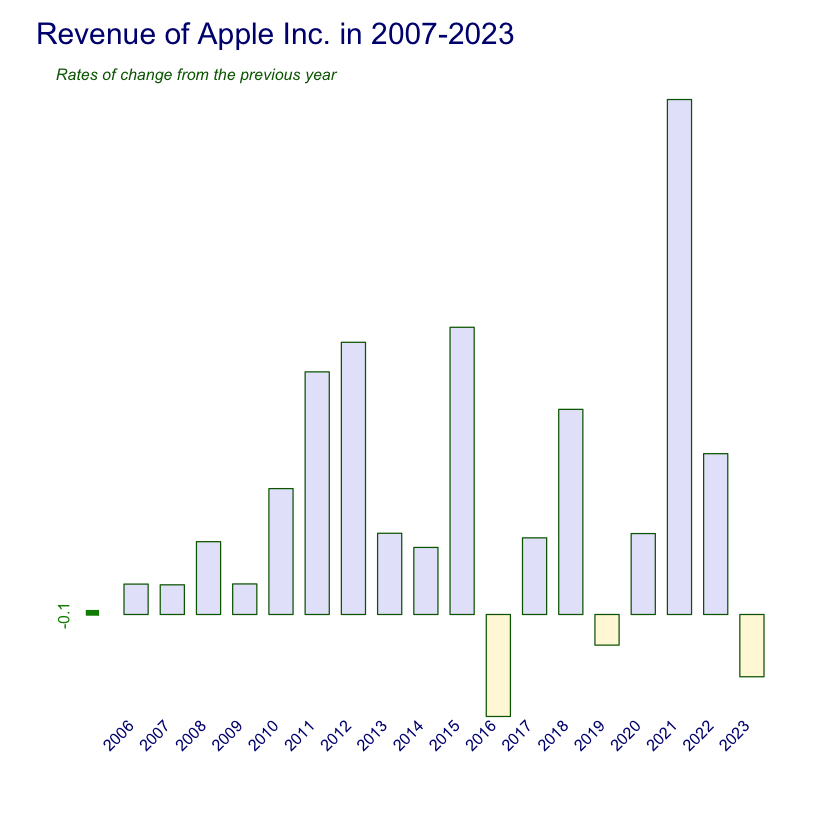

In [7]:
##create a vector containing the indexes of values < 0 in vector 'change_rate'
vec_ind_rate <- (change_rate < 0)

# Create chart and other elements
myColours <- rep('lavender', length(change_rate))
myColours[vec_ind_rate] <- 'cornsilk'
myplot3 <- barplot(change_rate, border = 'darkgreen', bty = "n", col = myColours,
                   ylim = c(min(change_rate) - 0.2, max(change_rate) + 0.2),
                   axes = F, space = 0.5)  # Tăng khoảng cách giữa các thanh

# Add y-axis
axis(2, col = "green4", cex.axis = 0.8, at = seq(-0.1, 0.7, by = 0.1),
     labels = seq(-0.1, 0.7, by = 0.1), col.axis = 'green4')

# Add labels for x-axis
text(myplot3, par("usr")[3], labels = df_new$Year,
     srt = 45, adj = 1.2, xpd = TRUE, col = 'navy', cex = 0.8)  # Xoay nhãn 45 độ để tránh chồng chéo

# Titling
mtext("Revenue of Apple Inc. in 2007-2023", side = 3,
      line = -2, adj = 0.1, cex = 1.5, col = "navy", outer = TRUE)

mtext("Rates of change from the previous year", side = 3,
      line = -3.5, adj = 0.1, cex = 0.8, font = 3, col = "darkgreen", outer = TRUE)


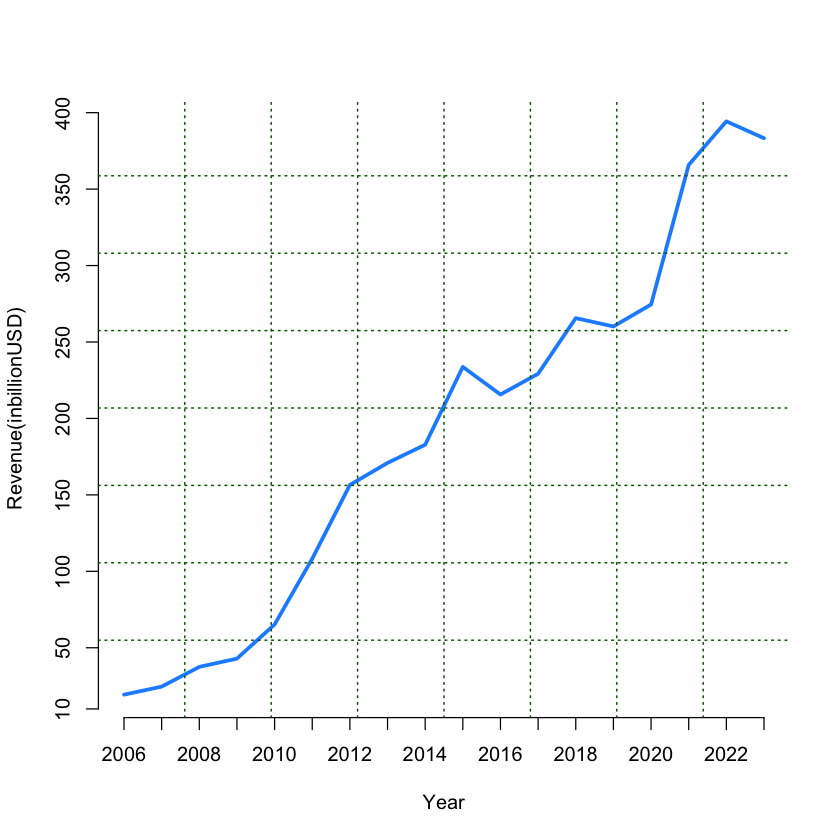

In [8]:
x_vec<-seq(as.numeric(df_new$Year[1]),
as.numeric(df_new$Year[length(df_new$Year)]),by=1)
y_vec<-c(10,seq(50,400,by=50))
#
plot(x_vec,df_new$Revenue,type='l',col='dodgerblue',lwd=3,
xlab="Year",ylab="Revenue(inbillionUSD)",axes=F)
##toaddadjustedaxestotheplot
axis(1,at=x_vec,labels=x_vec)
axis(2,at=y_vec,labels=y_vec)
##createagridtotheplot
grid(8,8,col='darkgreen',lty=3,lwd=1.2)

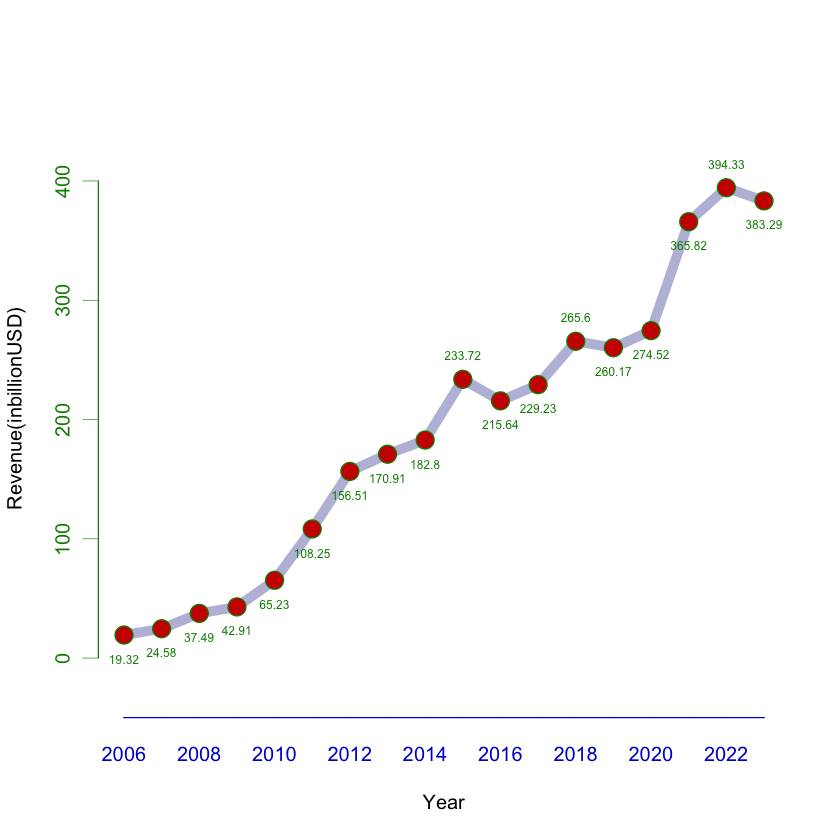

In [9]:
##
plot(df_new$Revenue,type="n",axes=F,
xlim=c(as.numeric(df_new$Year[1]),as.numeric(df_new$Year[length(df_new$Year)])),
ylim=c(min(df_new$Revenue)-50,450),
xlab="Year",ylab="Revenue(inbillionUSD)",xpd=TRUE)
##
x_vec<-seq(as.numeric(df_new$Year[1]),
as.numeric(df_new$Year[length(df_new$Year)]),by=1)
##
lines(x_vec,df_new$Revenue,lwd=8,type="l",col=rgb(0,0,139,80,maxColorValue=255))
#
points(x_vec,df_new$Revenue,pch=21,cex=2,col='green4',bg='red3')
##createavectorcontrollingthetextwillbeaddedoverorbeneathateachpoint
myfactor_vec<-rep(-20,length(x_vec))
#
for(k in 1:length(x_vec))
{
if(k>1&k<length(x_vec)){
if(df_new$Revenue[k]>df_new$Revenue[k-1]&
df_new$Revenue[k]>df_new$Revenue[k+1])
{myfactor_vec[k]<-20}
}
text(x_vec[k],df_new$Revenue[k]+myfactor_vec[k],df_new$Revenue[k],
col='green4',cex=0.6)
}
##
axis(1,at=c(2006:2023),tck=0,col='blue3',col.axis='blue3')
axis(2,lwd.ticks=0.5,cex.axis=1.0,tck=-0.025,col='green4',col.axis='green4')

# TRỰC QUAN HOÁ ĐỒNG THỜI NHIỀU DỮ LIỆU TIMESERIES

In [10]:
file_name = "../data-20241108/stock_price-US-nasdaq.csv"

In [11]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
mydata3 <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(mydata3)

,Date,Apple.Inc.,Microsoft.Corp.,Amazon.Inc.,Alphabet,Meta.Inc.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-19,39.48,101.12,76.96,52.73,135.68
2,Apr-19,47.81,119.02,90.71,59.95,168.70
3,Jul-19,50.39,135.68,96.11,55.00,193.00
4,Oct-19,56.15,137.07,86.78,60.30,175.81
5,Jan-20,75.09,160.62,94.90,68.43,209.78
6,Apr-20,60.23,152.11,95.39,55.11,159.60


In [12]:
mydata3_ts<-ts(mydata3[,-1],start=c(2019,1),deltat=3/12)

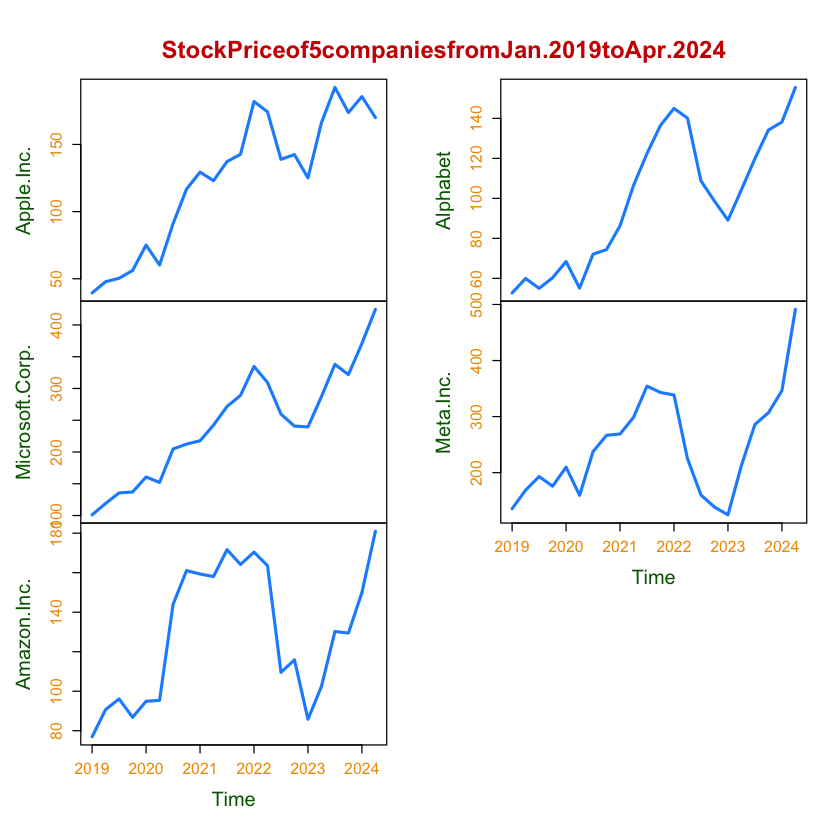

In [13]:
##
plot(mydata3_ts,col="dodgerblue",lwd=2.5,main="",
col.axis='orange2',col.lab='darkgreen',cex.axis=1.2)
#
title(main=("StockPriceof5companiesfromJan.2019toApr.2024"),col.main="red3")

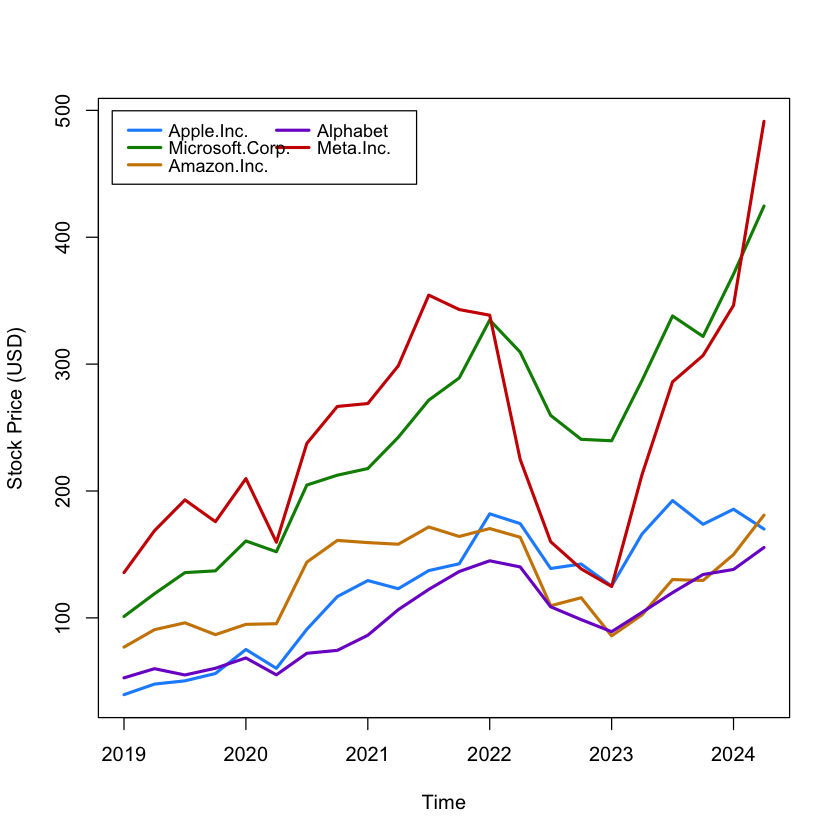

In [14]:
mycol_ts <- c("dodgerblue", "green4", "orange3", "purple3", "red3")

# Vẽ biểu đồ với nhiều dòng
plot(mydata3_ts, plot.type="single", lty=1, col=mycol_ts, lwd=2.5, ylab="Stock Price (USD)")

# Thêm legend với các điều chỉnh
legend('topleft', legend=colnames(mydata3)[-1], lty=1, lwd=2.5, col=mycol_ts, 
       cex=0.9, x.intersp=0.5, y.intersp=0.8, text.width=0.75, 
       ncol=2, inset=c(0.02, 0.02), border="black", bty="o")


## VÍ DỤ 4

In [15]:
date_start<-as.Date("01Jan2019","%d%b%Y")
date_vec<-seq(date_start,length.out=length(mydata3$Date),by="3 month")

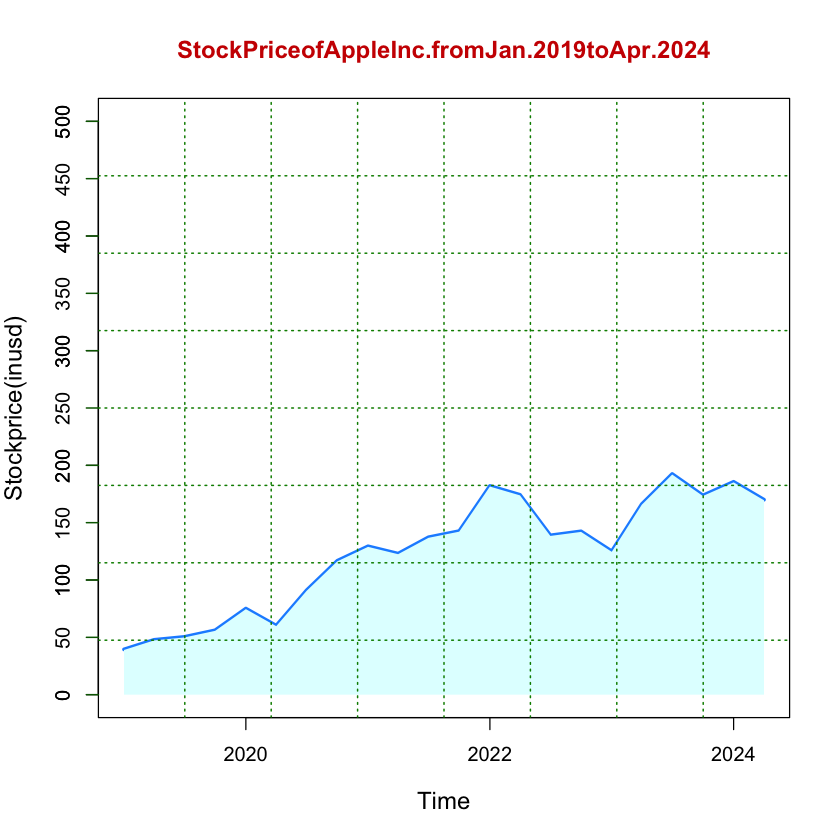

In [16]:
##
plot(date_vec,mydata3$Apple.Inc.,axes=T,type="n",xlab="Time",
ylab="Stockprice(inusd)",cex.lab=1.2,
ylim=c(0,round(max(mydata3[,-1]),digits=-2)),xpd=T)
##
axis(2,at=seq(0,round(max(mydata3[,-1]),digits=-2),by=50),
col.ticks="darkgreen",lwd.ticks=1.2,)#,tck=-0.025)
##
lines(date_vec,mydata3$Apple.Inc.,type="l",col='dodgerblue',lwd=3,xpd=T)
##
title(main=("StockPriceofAppleInc.fromJan.2019toApr.2024"),col.main="red3")
##
xx<-c(date_vec,rev(date_vec))
yy<-c(rep(0,length(mydata3$Apple.Inc.)),rev(mydata3$Apple.Inc.)-0.5)
##
polygon(xx,yy,col='lightcyan',border=F,lwd=0.01)
grid(8,8,col='green4',lwd=1.2)

# BÀI TẬP THỰC HÀNH

## BÀI 1:

In [17]:
file_name = "../data-20241108/Apple-revenue-1992-2023.csv"

In [18]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,Year,Revenue
,<int>,<dbl>
1,1992,7.09
2,1993,7.98
3,1994,9.19
4,1995,11.06
5,1996,9.83
6,1997,7.08


In [19]:
df$change_rate <- c(NA, diff(df$Revenue))
change_rate = df$change_rate[-1]

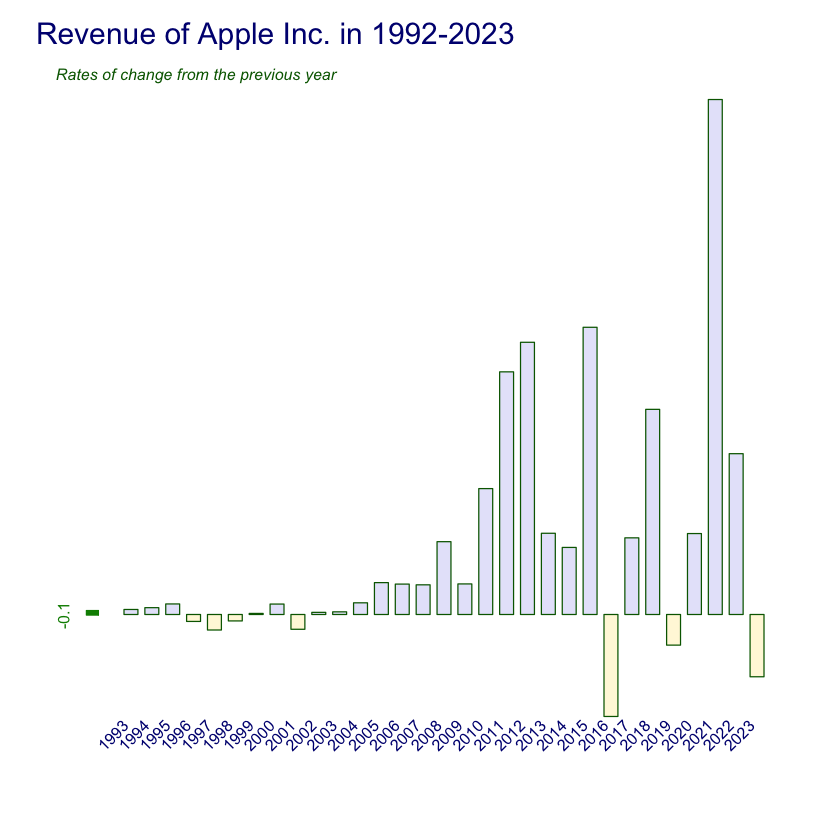

In [20]:
##create a vector containing the indexes of values < 0 in vector 'change_rate'
vec_ind_rate <- (change_rate < 0)

# Create chart and other elements
myColours <- rep('lavender', length(change_rate))
myColours[vec_ind_rate] <- 'cornsilk'
myplot3 <- barplot(change_rate, border = 'darkgreen', bty = "n", col = myColours,
                   ylim = c(min(change_rate) - 0.2, max(change_rate) + 0.2),
                   axes = F, space = 0.5)  # Tăng khoảng cách giữa các thanh

# Add y-axis
axis(2, col = "green4", cex.axis = 0.8, at = seq(-0.1, 0.7, by = 0.1),
     labels = seq(-0.1, 0.7, by = 0.1), col.axis = 'green4')

# Add labels for x-axis
text(myplot3, par("usr")[3], labels = df$Year[-1],
     srt = 45, adj = 1.2, xpd = TRUE, col = 'navy', cex = 0.8)  # Xoay nhãn 45 độ để tránh chồng chéo

# Titling
mtext("Revenue of Apple Inc. in 1992-2023", side = 3,
      line = -2, adj = 0.1, cex = 1.5, col = "navy", outer = TRUE)

mtext("Rates of change from the previous year", side = 3,
      line = -3.5, adj = 0.1, cex = 0.8, font = 3, col = "darkgreen", outer = TRUE)


## BÀI 2

In [21]:
file_name = "../data-20241108/stock_price-US-nasdaq.csv"
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df)

,Date,Apple.Inc.,Microsoft.Corp.,Amazon.Inc.,Alphabet,Meta.Inc.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-19,39.48,101.12,76.96,52.73,135.68
2,Apr-19,47.81,119.02,90.71,59.95,168.70
3,Jul-19,50.39,135.68,96.11,55.00,193.00
4,Oct-19,56.15,137.07,86.78,60.30,175.81
5,Jan-20,75.09,160.62,94.90,68.43,209.78
6,Apr-20,60.23,152.11,95.39,55.11,159.60


In [22]:
mysubdata_ex2 = df[c("Date", "Microsoft.Corp.", "Alphabet")]
head(mysubdata_ex2)

,Date,Microsoft.Corp.,Alphabet
,<chr>,<dbl>,<dbl>
1,Jan-19,101.12,52.73
2,Apr-19,119.02,59.95
3,Jul-19,135.68,55.00
4,Oct-19,137.07,60.30
5,Jan-20,160.62,68.43
6,Apr-20,152.11,55.11


In [23]:
mysubdata_ex2$Date = paste0("01-",mysubdata_ex2$Date)

In [24]:
date_start <- as.Date(paste0("01-", "Jan-19"), "%d-%b-%y")
date_vec<-seq(date_start,length.out=length(mysubdata_ex2$Date),by="3 month")
##

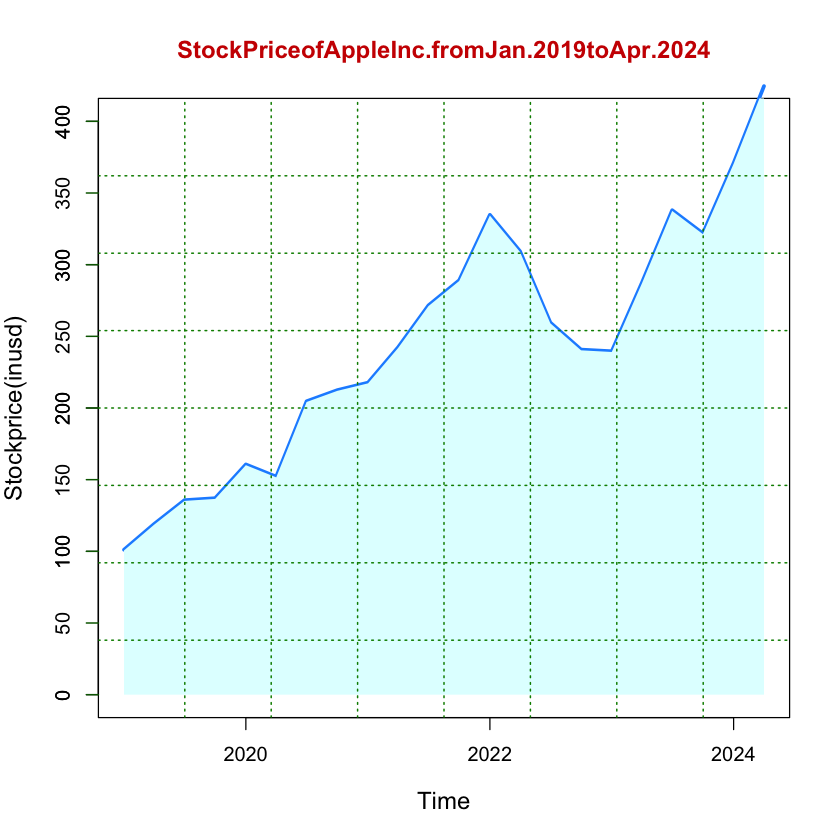

In [25]:

plot(date_vec,mysubdata_ex2[["Microsoft.Corp."]],axes=T,type="n",xlab="Time",
ylab="Stockprice(inusd)",cex.lab=1.2,
ylim=c(0,round(max(mysubdata_ex2[,-1]),digits=-2)),xpd=T)
##
axis(2,at=seq(0,round(max(mysubdata_ex2[,-1]),digits=-2),by=50),
col.ticks="darkgreen",lwd.ticks=1.2,)#,tck=-0.025)
##
lines(date_vec,mysubdata_ex2[["Microsoft.Corp."]],type="l",col='dodgerblue',lwd=3,xpd=T)
##
title(main=("StockPriceofAppleInc.fromJan.2019toApr.2024"),col.main="red3")
##
xx<-c(date_vec,rev(date_vec))
yy<-c(rep(0,length(mysubdata_ex2[["Microsoft.Corp."]])),rev(mysubdata_ex2[["Microsoft.Corp."]])-0.5)
##
polygon(xx,yy,col='lightcyan',border=F,lwd=0.01)
grid(8,8,col='green4',lwd=1.2)

In [26]:
mysubdata_ex2_ts<-ts(mysubdata_ex2[,-1],start=c(2019,1),deltat=3/12)

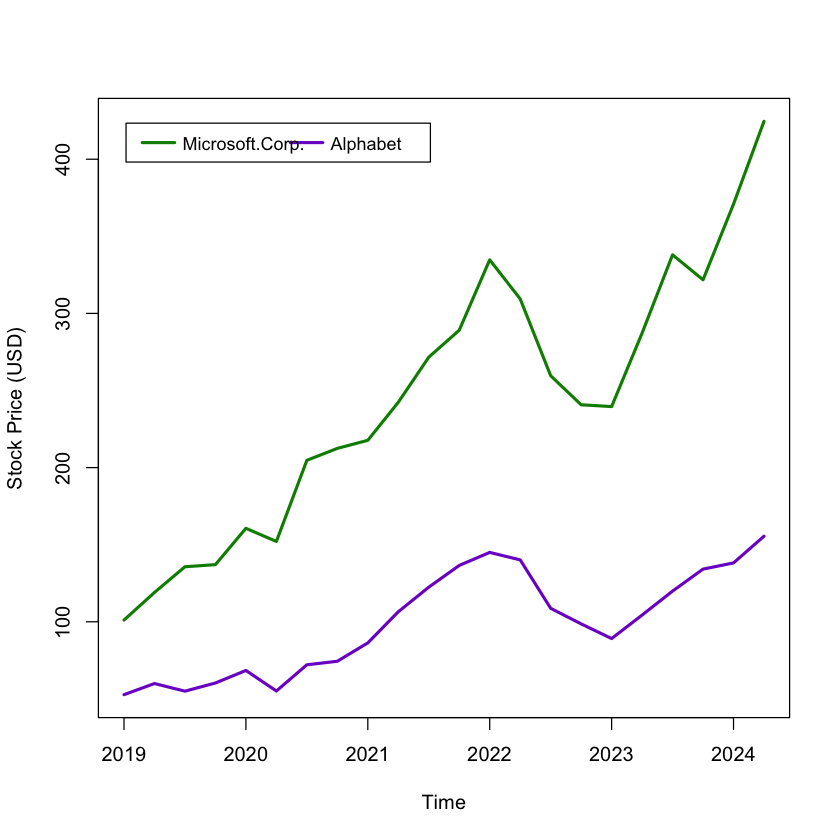

In [27]:
mycol_ts <- c("green4", "purple3")

# Vẽ biểu đồ với nhiều dòng
plot(mysubdata_ex2_ts, plot.type="single", lty=1, col=mycol_ts, lwd=2.5, ylab="Stock Price (USD)")

# Thêm legend với các điều chỉnh
legend('topleft', legend=colnames(mysubdata_ex2)[-1], lty=1, lwd=2.5, col=mycol_ts, 
       cex=0.9, x.intersp=0.5, y.intersp=0.8, text.width=0.75, 
       ncol=2, inset=c(0.04, 0.04), border="black", bty="o")


In [28]:
mysubdata_ex2_ts

,Microsoft.Corp.,Alphabet
2019 Q1,101.12,52.73
2019 Q2,119.02,59.95
2019 Q3,135.68,55.00
2019 Q4,137.07,60.30
2020 Q1,160.62,68.43
2020 Q2,152.11,55.11
2020 Q3,204.70,72.10
2020 Q4,212.46,74.40
2021 Q1,217.69,86.31
2021 Q2,242.35,106.49


## BÀI 3

In [29]:
file_name = "../data-20241108/AirPassengers.csv"
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, file_name, sep = "/")
# Gán dữ liệu vào biến df
df_ex_3 <- read.csv(path,header = TRUE, sep = ",")
# # Xem 6 dòng đầu tiên của dữ liệu
head(df_ex_3)

,Month,Passengers
,<chr>,<int>
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129
5,1949-05,121
6,1949-06,135


In [30]:
df_ex_3_ts<-ts(df_ex_3[,-1],start=c(1949,1),deltat=1/12)

In [31]:
df_ex_3_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


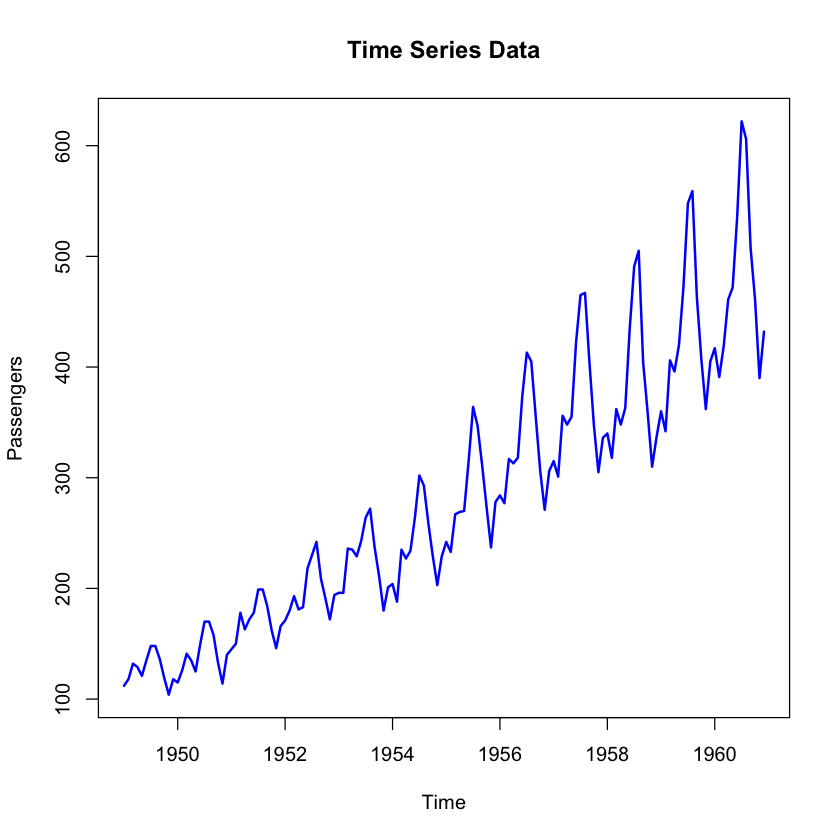

In [32]:
plot(df_ex_3_ts, 
     main = "Time Series Data", 
     ylab = "Passengers", 
     xlab = "Time", 
     col = "blue", 
     lwd = 2)

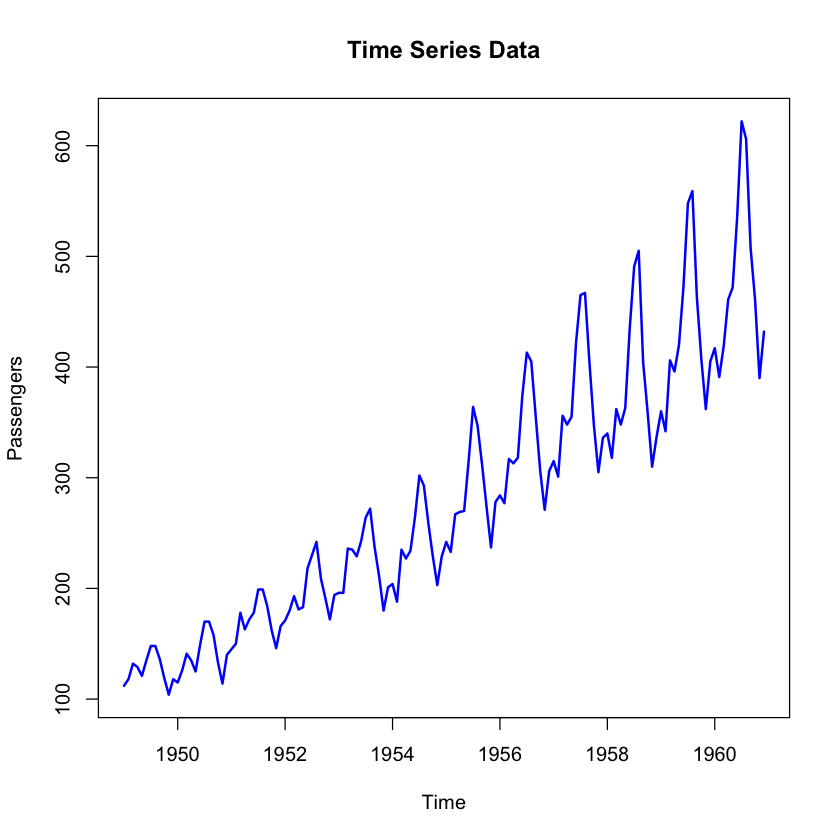

In [33]:
ts.plot(df_ex_3_ts, 
     gpars = list(main = "Time Series Data", 
     ylab = "Passengers", 
     xlab = "Time", 
     col = "blue", 
     lwd = 2)
     )

## BÀI 4

In [34]:
xichma = 1.2
t = 651
set.seed(123)
W_t = rnorm(t, mean = 0, sd = xichma)


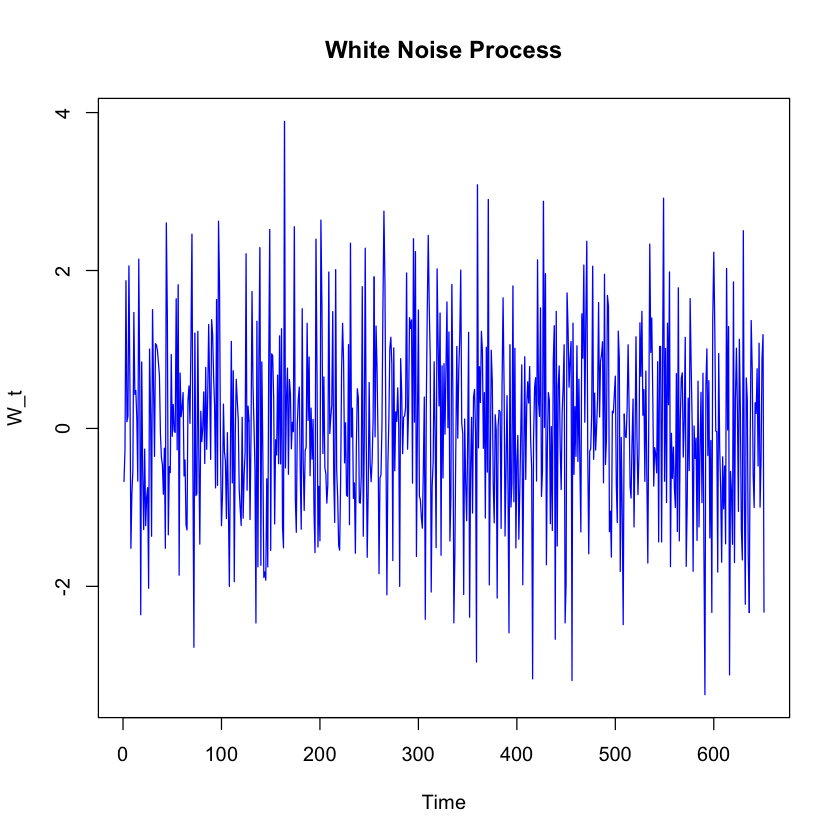

In [35]:
plot(W_t, type = "l", col = "blue", main = "White Noise Process", 
     xlab = "Time", ylab = "W_t")

In [36]:
W_t

[1] -0.672570776 -0.276212987  1.870449977  0.084610070  0.155145282
  [6]  2.058077984  0.553099447 -1.518073482 -0.824223422 -0.534794364
 [11]  1.468898157  0.431776592  0.480925741  0.132819259 -0.667009362
 [16]  2.144295764  0.597420574 -2.359940588  0.841627082 -0.567349689
 [21] -1.281388447 -0.261569898 -1.231205338 -0.874669475 -0.750047121
 [26] -2.024031973  1.005344453  0.184047741 -1.365764324  1.504577905
 [31]  0.511757066 -0.354085780  1.074150793  1.053760185  0.985897298
 [36]  0.826368305  0.664701184 -0.074294053 -0.367155196 -0.456565201
 [41] -0.833648375 -0.249500734 -1.518475622  2.602747158  1.449554398
 [46] -1.347730300 -0.483461802 -0.559986424  0.935958142 -0.100042880
 [51]  0.303982217 -0.034256106 -0.051444549  1.642322741 -0.270925183
 [56]  1.819764725 -1.858503365  0.701536500  0.148625093  0.259129882
 [61]  0.455567379 -0.602788144 -0.399848860 -1.222290460 -1.286149472
 [66]  0.364234370  0.537851734  0.063605072  1.106720961  2.460101623
 [71] -0.589237399 -2.771002651  1.206886229 -0.851040915 -0.825610340
 [76]  1.230685644 -0.341727608 -1.464861255  0.217564176 -0.166669635
 [81]  0.006917023  0.462336481 -0.444792038  0.773251858 -0.264583874
 [86]  0.398138357  1.316206816  0.522217789 -0.391117903  1.378569142
 [91]  1.192204627  0.658076351  0.286478082 -0.753487291  1.632782938
 [96] -0.720311505  2.624799592  1.839132751 -0.282840431 -1.231705080
[101] -0.852487876  0.308260451 -0.296030254 -0.417051119 -1.141942281
[106] -0.054033270 -0.941885363 -2.001530324 -0.456271824  1.102795931
[111] -0.690416355  0.729557187 -1.941459250 -0.066674359  0.623288645
[116]  0.361384035  0.126811433 -0.768847210 -1.019645215 -1.228954549
[121]  0.141175917 -1.136969537 -0.588668932 -0.307310631  2.212634406
[126] -0.782339882  0.282463887  0.093553019 -1.154227961 -0.085569703
[131]  1.733461030  0.541804864  0.049479506 -0.506996199 -2.463896666
[136]  1.357604656 -1.752768085  0.887937013  2.290924283 -1.732671793
[141]  0.842141202 -0.314636987 -1.886572991 -1.817601185 -1.921843408
[146] -0.637087827 -1.754106702  0.825500128  2.520130729 -1.544436571
[151]  0.945286617  0.922850689  0.398643095 -1.210051930 -0.143343128
[156] -0.336474402  0.675587440 -0.446926507  1.172368064 -0.449497029
[161]  1.263253759 -1.259012408 -1.512186294  3.889247922 -0.500229106
[166]  0.357873110  0.763883609 -0.580536751  0.620234453  0.442757433
[171] -0.258456609  0.078351640 -0.040880704  2.554142279 -0.889603316
[176] -1.315195520  0.045346079  0.372576899  0.523828175 -0.550038399
[181] -1.275991361  1.515822211 -0.419580466 -1.038615435 -0.283535483
[186] -0.236611073  1.331904348  0.101684751  0.904864542 -0.599150421
[191]  0.257334371 -0.389623094  0.113500234 -1.074436030 -1.572961840
[196]  2.396656062  0.720850588 -1.501525634 -0.733399100 -1.422576102
[201]  2.638572419  1.574895572 -0.318174068  0.651832871 -0.497207938
[206] -0.571496274 -0.946323405 -0.713540721  1.981088961 -0.064833750
[211]  0.143094284  0.292424916  1.478971054 -0.619276597 -1.191008580
[216]  2.010836319 -0.529395860 -0.867679164 -1.483527743 -1.541658867
[221] -0.688768175  0.741582981  1.331817767  0.849106025 -0.436388757
[226]  0.071699925 -0.845515756 -0.860661794  1.061580599 -1.218711094
[231]  2.346352759 -0.108383513  0.257446592 -0.886233246 -0.689266428
[236] -1.580419359 -0.219510466  0.502778886  0.389165213 -0.937843784
[241] -0.946346365 -0.602638462  1.795272804 -1.364764345 -0.214861913
[246]  2.282834186 -0.121169862 -1.631808845 -0.797723322  0.582551975
[251] -0.450723446 -0.674251636 -0.412700681  0.108595977  1.918210525
[256] -0.106278135  1.296959395  0.756904939 -0.136367875 -1.839482403
[261] -0.625340781 -0.587844544  0.056585319  1.560238413  2.751694769
[266]  1.857097271 -0.159781157 -2.107832875 -0.466535837  0.107048668
[271]  1.014015605  1.155033562  0.821171315 -1.674329220  1.019571655
[276] -0.535868660  0.209763240  0.089461413  0.513800118  0.029609979
[281] -2.000970117  0.8837

In [37]:
# V_t <- SMA(W_t, n = 3) 
V_t = filter(W_t, sides = 2, filter = c(1/3, 1/3, 1/3))

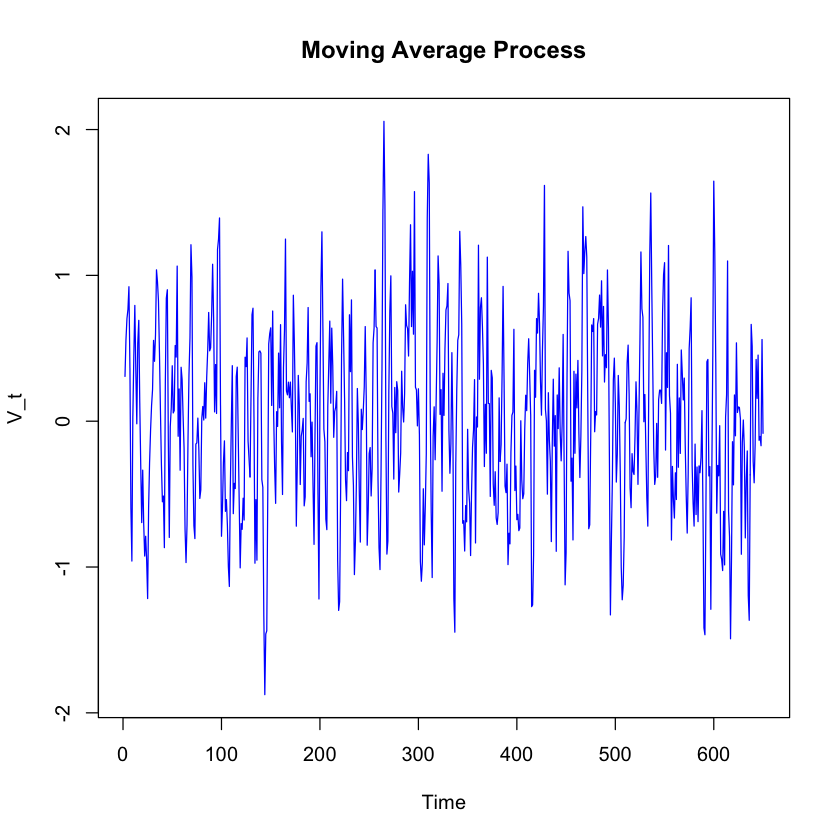

In [38]:
plot(V_t, type = "l", col = "blue", main = "Moving Average Process", 
     xlab = "Time", ylab = "V_t")

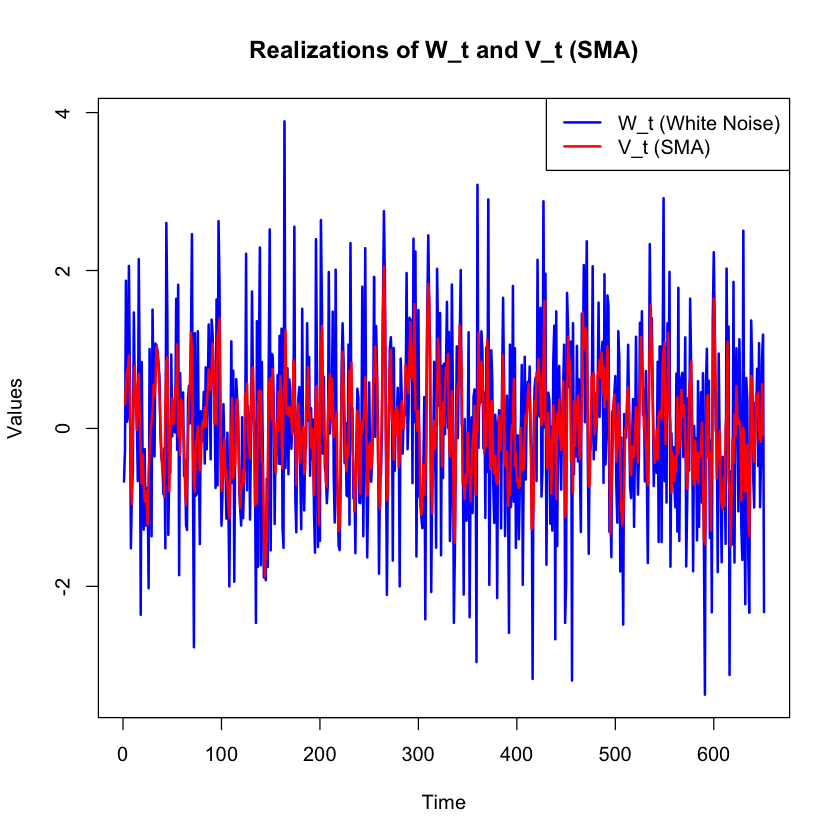

In [39]:
# Plot W_t
plot(W_t, type = "l", col = "blue", lwd = 2, ylim = range(c(W_t, V_t), na.rm = TRUE),
     ylab = "Values", xlab = "Time", main = "Realizations of W_t and V_t (SMA)")

# Add V_t to the plot
lines(V_t, col = "red", lwd = 2)

# Add a legend
legend("topright", legend = c("W_t (White Noise)", "V_t (SMA)"), 
       col = c("blue", "red"), lty = 1, lwd = 2)

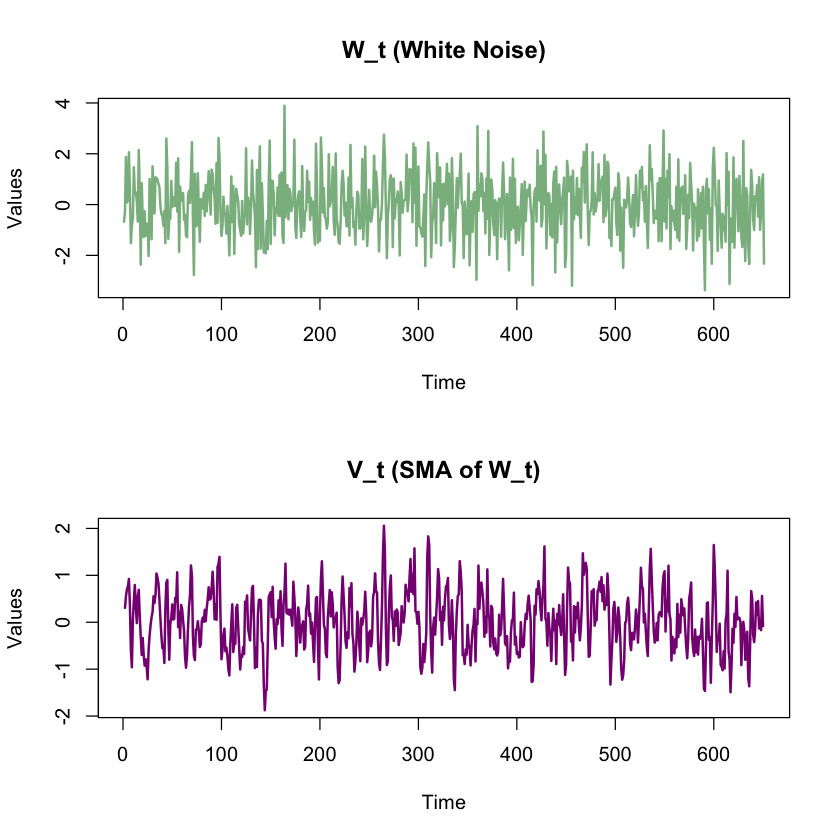

In [40]:
# Set up the plotting area to have 1 row and 2 columns
par(mfrow=c(2,1))

# Plot the first time series W_t
plot(W_t, type = "l", col = "#8aba8f", lwd = 2, ylab = "Values", xlab = "Time", main = "W_t (White Noise)")

# Plot the second time series V_t (SMA of W_t)
plot(V_t, type = "l", col = "#871c82", lwd = 2, ylab = "Values", xlab = "Time", main = "V_t (SMA of W_t)")


## BÀI 5

### CÂU A

In [41]:
xichma = 1.5
t = 251
set.seed(123)
W_t = rnorm(t, mean = 0, sd = xichma)


In [42]:
ro = 0
X_t_a <- numeric(t + 1)
for (index in 1: t+1){
    if (index == 1){
        X_t_a[index] = 0
    }
    else {
       X_t_a[index] = ro + X_t_a[index - 1] + W_t[index]
    }
}

In [43]:
ro = 0.6
X_t_b <- numeric(t + 1)
for (index in 1: t+1){
    if (index == 1){
        X_t_b[index] = 0
    }
    else {
       X_t_b[index] = ro + X_t_b[index - 1] + W_t[index]
    }
}

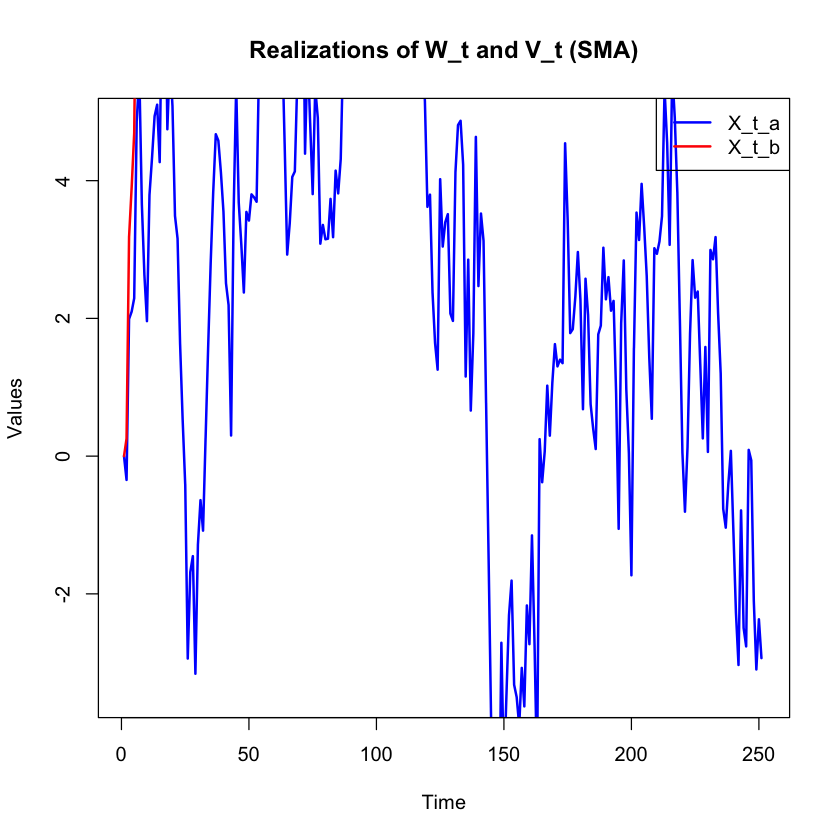

In [44]:
# Plot W_t
plot(X_t_a, type = "l", col = "blue", lwd = 2, ylim = range(c(W_t, V_t), na.rm = TRUE),
     ylab = "Values", xlab = "Time", main = "Realizations of W_t and V_t (SMA)")

# Add V_t to the plot
lines(X_t_b, col = "red", lwd = 2)

# Add a legend
legend("topright", legend = c("X_t_a", "X_t_b"), 
       col = c("blue", "red"), lty = 1, lwd = 2)

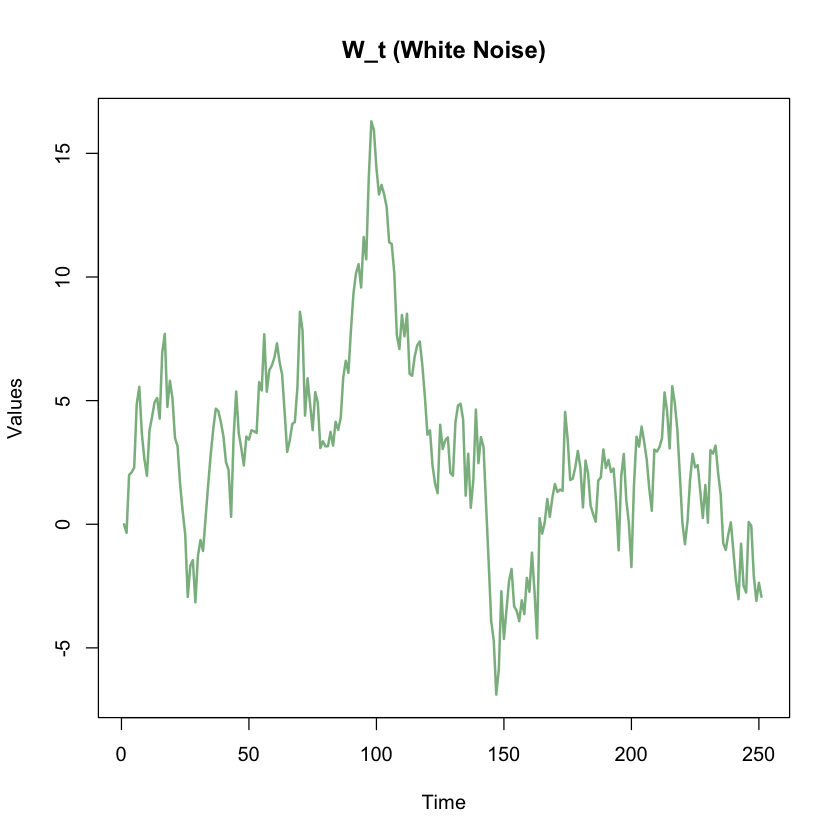

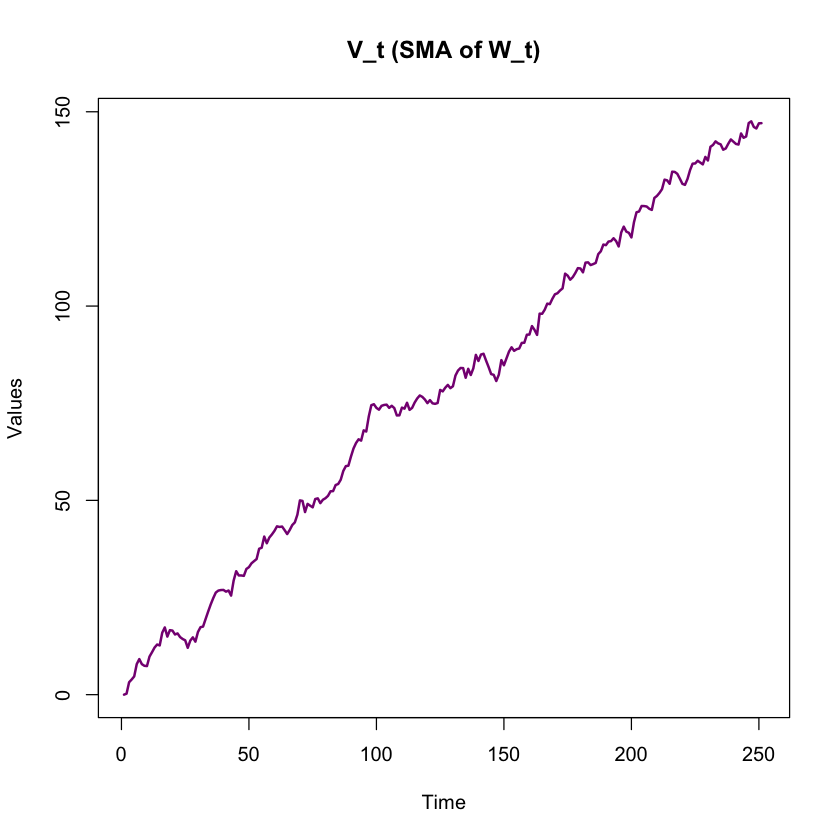

In [45]:
# Set up the plotting area to have 1 row and 2 columns
# par(mfrow=c(2,1))

# Plot the first time series W_t
plot(X_t_a, type = "l", col = "#8aba8f", lwd = 2, ylab = "Values", xlab = "Time", main = "W_t (White Noise)")

# Plot the second time series V_t (SMA of W_t)
plot(X_t_b, type = "l", col = "#871c82", lwd = 2, ylab = "Values", xlab = "Time", main = "V_t (SMA of W_t)")


# BÀI 7

In [46]:
library(astsa)

In [47]:
EQ5
EXP6

A Time Series:
   [1]  1.749316e-02  1.139078e-02  1.512399e-02  1.476502e-02  6.508857e-03
   [6] -2.321631e-03 -1.309052e-02 -1.775706e-02 -2.558246e-02 -4.029995e-02
  [11] -5.121243e-02 -5.523282e-02 -5.616614e-02 -5.236113e-02 -4.661772e-02
  [16] -4.166400e-02 -3.218737e-02 -1.804423e-02 -4.188240e-03 -9.605289e-05
  [21] -6.916374e-03 -1.043421e-02 -6.704032e-04  8.662641e-03  5.360186e-03
  [26] -5.049765e-03 -1.136750e-02 -8.711189e-03 -4.116446e-03 -3.111362e-03
  [31] -9.605289e-05  7.944733e-03  1.332918e-02  1.641628e-02  1.986232e-02
  [36]  2.093920e-02  2.022126e-02  1.677522e-02  1.447785e-02  1.131898e-02
  [41]  2.201319e-03 -4.619002e-03 -9.859860e-03 -1.639301e-02 -1.689553e-02
  [46] -1.316231e-02 -1.093674e-02 -1.330590e-02 -1.596224e-02 -1.940829e-02
  [51] -1.775706e-02 -1.273158e-02 -7.777870e-03 -3.039569e-03  3.637165e-03
  [56]  1.160616e-02  1.785210e-02  2.416983e-02  2.524677e-02  2.790305e-02
  [61]  3.170809e-02  3.063121e-02  2.646723e-02  2.251860e-02  2.072379e-02
  [66]  1.612911e-02  8.878022e-03  2.847433e-03 -5.480498e-03 -1.445460e-02
  [71] -1.969546e-02 -2.156207e-02 -2.529529e-02 -2.924389e-02 -2.744907e-02
  [76] -2.709010e-02 -3.283352e-02 -3.864872e-02 -4.525363e-02 -5.358160e-02
  [81] -5.674046e-02 -5.501744e-02 -5.200216e-02 -4.690486e-02 -4.037175e-02
  [86] -3.793079e-02 -3.606418e-02 -3.505909e-02 -3.814617e-02 -3.943843e-02
  [91] -2.220821e-02  7.657558e-03  3.242603e-02  4.944089e-02  5.425099e-02
  [96]  4.872295e-02  3.730795e-02  1.569834e-02 -1.244441e-02 -4.633054e-02
 [101] -7.203230e-02 -7.002211e-02 -3.929484e-02  3.996134e-03  3.687719e-02
 [106]  4.585126e-02  3.730795e-02  3.012863e-02  2.955434e-02  3.335932e-02
 [111]  4.161546e-02  5.669191e-02  6.580958e-02  5.697909e-02  4.061040e-02
 [116]  3.824124e-02  5.468175e-02  6.703010e-02  6.071231e-02  4.297957e-02
 [121]  2.294937e-02  1.433426e-02  3.091839e-02  6.882492e-02  1.087416e-01
 [126]  1.309256e-01  1.354485e-01  1.330076e-01  1.203720e-01  1.039315e-01
 [131]  9.287545e-02  8.239374e-02  6.595317e-02  3.127733e-02 -1.940829e-02
 [136] -7.267845e-02 -1.059184e-01 -1.027596e-01 -8.172432e-02 -5.121243e-02
 [141] -1.222903e-02  1.088822e-02  6.221682e-03 -1.589045e-02 -4.245374e-02
 [146] -6.442228e-02 -7.504761e-02 -7.009390e-02 -5.738661e-02 -4.812536e-02
 [151] -5.408415e-02 -7.217589e-02 -8.674979e-02 -8.244225e-02 -5.896604e-02
 [156] -4.073071e-02 -3.900769e-02 -3.685391e-02 -1.617762e-02  1.368815e-02
 [161]  1.088822e-02 -1.718271e-02 -3.951022e-02 -4.511005e-02 -3.635135e-02
 [166] -3.290531e-02 -3.197199e-02 -8.208632e-03  3.127733e-02  4.384103e-02
 [171]  7.654428e-04 -5.329442e-02 -5.781737e-02 -5.480498e-03  7.327601e-02
 [176]  1.236745e-01  1.139107e-01  5.073312e-02 -2.170566e-02 -6.923240e-02
 [181] -8.251405e-02 -7.210410e-02 -4.891506e-02 -1.883394e-02  2.754411e-02
 [186]  5.669191e-02  3.651819e-02 -2.242357e-02 -9.794945e-02 -1.025442e-01
 [191] -4.245374e-02  4.642248e-03  1.677522e-02  1.921615e-02  2.517495e-02
 [196]  3.903094e-02  5.360487e-02  5.590221e-02  2.460060e-02 -4.029995e-02
 [201] -9.450340e-02 -1.062056e-01 -6.406331e-02  7.370383e-03  6.889668e-02
 [206]  8.045533e-02  2.948251e-02 -3.362322e-02 -6.219670e-02 -5.264828e-02
 [211] -5.695879e-03  6.480452e-02  1.129056e-01  1.101057e-01  7.528624e-02
 [216]  6.257895e-02  6.265071e-02  3.781047e-02 -6.916374e-03 -6.499663e-02
 [221] -1.064210e-01 -1.258050e-01 -1.151079e-01 -5.932501e-02  1.842350e-03
 [226]  4.908189e-02  6.789157e-02  5.776885e-02  4.003605e-02  2.000591e-02
 [231] -2.106249e-03 -3.146946e-02 -2.816698e-02  3.350291e-02  8.749101e-02
 [236]  6.817874e-02  4.355073e-03 -3.498730e-02 -4.116145e-02 -2.113131e-02
 [241]  3.099015e-02  6.803516e-02  4.699990e-02 -1.804423e-02 -7.145795e-02
 [246] -6.829908e-02 -1.682374e-02  3.400543e-02  2.969792e-02 -2.184924e-02
 [251] -7.813469e-02 -1.153951e-01 -1.020416e-01 -6.219670e-02 -3.793079e-02
 [256] -1.976725e-02  4.782677e-04  2.280578e-02  1.864180

A Time Series:
   [1] -1.837432e-03 -5.537868e-04 -2.283871e-03 -3.026128e-04 -7.212162e-04
   [6] -1.390934e-03 -9.444356e-04 -4.906952e-03 -3.093123e-03  2.599478e-03
  [11]  4.524887e-03  4.441202e-03  4.524887e-03  1.706541e-03  1.371682e-03
  [16]  6.617785e-03  4.190028e-03  5.110919e-03  6.338716e-03  4.524887e-03
  [21]  6.534040e-03  5.110919e-03  4.720271e-03  2.069294e-03  2.766907e-03
  [26]  6.450355e-03  1.064718e-03 -1.223505e-03 -4.376769e-03 -1.258081e-02
  [31] -8.674085e-03 -2.897799e-03 -3.316343e-03  1.371682e-03  4.915595e-03
  [36]  8.972883e-04 -2.144337e-03  2.599478e-03 -6.413817e-03 -2.279401e-02
  [41] -2.647743e-02 -2.742621e-02 -2.262658e-02 -9.567082e-03  1.996756e-04
  [46]  1.434743e-02  2.556521e-02  4.071754e-02  5.411190e-02  4.230815e-02
  [51] -3.595412e-03 -8.744964e-02 -1.090201e-01 -5.837274e-02 -2.011514e-02
  [56]  5.999982e-02  7.484525e-02  4.649389e-02  4.691243e-02  3.276467e-02
  [61]  2.425367e-02 -2.488685e-02 -1.180055e-01 -1.369529e-01 -1.417805e-01
  [66] -1.065534e-02  2.138116e-01  2.604408e-01  1.057918e-01 -7.547843e-02
  [71] -1.419758e-01 -8.410105e-02 -2.971441e-02 -5.537868e-04  1.390094e-02
  [76] -5.856806e-02 -3.172356e-02  7.347792e-02  8.480728e-02  7.908678e-02
  [81] -4.735029e-02 -1.296698e-01 -1.180892e-01 -4.790840e-02  5.285621e-02
  [86]  1.395288e-01  1.713683e-01  8.112389e-02  4.417777e-02 -1.579095e-01
  [91] -3.700984e-01 -2.008552e-01 -3.119338e-02  1.199117e-01  2.707098e-01
  [96]  1.923528e-01  3.273678e-02 -5.817741e-02 -9.300271e-02 -1.003138e-01
 [101] -1.374552e-01 -3.599301e-02  1.068243e-01  1.604296e-01  8.977437e-02
 [106] -9.757912e-02 -1.143500e-01 -6.663260e-02  7.036328e-03  8.410966e-02
 [111]  7.995188e-02  6.862247e-02  2.962232e-03 -2.432877e-02 -6.652096e-02
 [116]  3.391504e-04 -5.632460e-03 -7.307863e-02 -4.988965e-02  2.179801e-02
 [121]  8.581185e-02  1.552114e-01  7.824963e-02 -1.347375e-02 -7.098576e-02
 [126] -1.652206e-01 -1.421432e-01  1.818120e-03  4.881001e-02  1.343385e-01
 [131]  1.956456e-01  9.408295e-03 -4.176933e-02 -1.244128e-02 -7.681787e-02
 [136] -9.582111e-02 -3.097013e-02  5.609316e-02  1.402264e-01  7.760787e-02
 [141] -2.642164e-02 -6.358027e-03  8.360738e-02 -2.572399e-02 -5.309871e-02
 [146] -1.590151e-02 -1.146460e-02  4.971385e-03  8.070529e-02  1.073266e-01
 [151]  9.234160e-02 -2.982602e-02 -1.535285e-01 -1.303395e-01 -2.416134e-02
 [156]  9.529954e-02  1.354268e-01  1.249624e-01  4.035479e-02 -1.184799e-01
 [161] -1.362832e-01 -6.306076e-02  6.923640e-02  1.074382e-01  1.710999e-02
 [166] -6.353515e-02 -1.005370e-01 -3.680226e-02  2.168643e-02  1.288971e-01
 [171]  1.382731e-01  9.547770e-03 -1.087690e-01 -1.161638e-01 -9.503978e-02
 [176] -3.942531e-02  4.356384e-02  9.638786e-02  1.145818e-01  1.058030e-02
 [181] -8.898440e-02 -7.826892e-02 -4.383427e-02  6.987816e-02  8.324462e-02
 [186]  4.649389e-02 -7.444596e-02 -9.132841e-02 -7.042766e-02 -5.655891e-02
 [191]  9.337413e-02  9.529954e-02  4.735893e-02 -5.537868e-04 -7.522729e-02
 [196] -9.704894e-02 -5.867970e-02 -1.989186e-02 -1.072884e-04  8.092850e-02
 [201]  7.819384e-02  1.674724e-02  4.936808e-02 -5.164766e-02 -9.933713e-02
 [206] -5.371261e-02 -3.286767e-02 -2.056158e-02  6.312519e-02  3.678298e-02
 [211] -8.897364e-03 -1.028180e-03 -3.755569e-02 -1.640379e-02  3.672719e-02
 [216] -2.522171e-02  4.748166e-03  4.903322e-02 -1.188320e-02 -2.949116e-02
 [221] -1.548290e-02 -5.789834e-02 -4.785258e-02 -7.491112e-04  2.436531e-02
 [226]  5.927432e-02  2.863473e-02 -2.851450e-02 -3.504425e-02 -5.404747e-02
 [231] -2.806801e-02  1.203132e-02  6.896853e-03 -2.367616e-03 -6.654263e-04
 [236] -4.779679e-02 -1.779902e-02  4.261512e-02  4.805654e-02  3.831774e-02
 [241] -1.418829e-03 -6.984165e-02 -7.271585e-02 -3.496054e-02  1.147324e-02
 [246]  6.513435e-02  6.934798e-02  4.339641e-02  2.470016e-02 -1.330632e-02
 [251] -5.019659e-02 -4.093218e-02 -4.516304e-03  2.292514e-03  3.460640e-02
 [256]  5.402821e-02  1.786345e-02  3.129661e-03 -1.165992

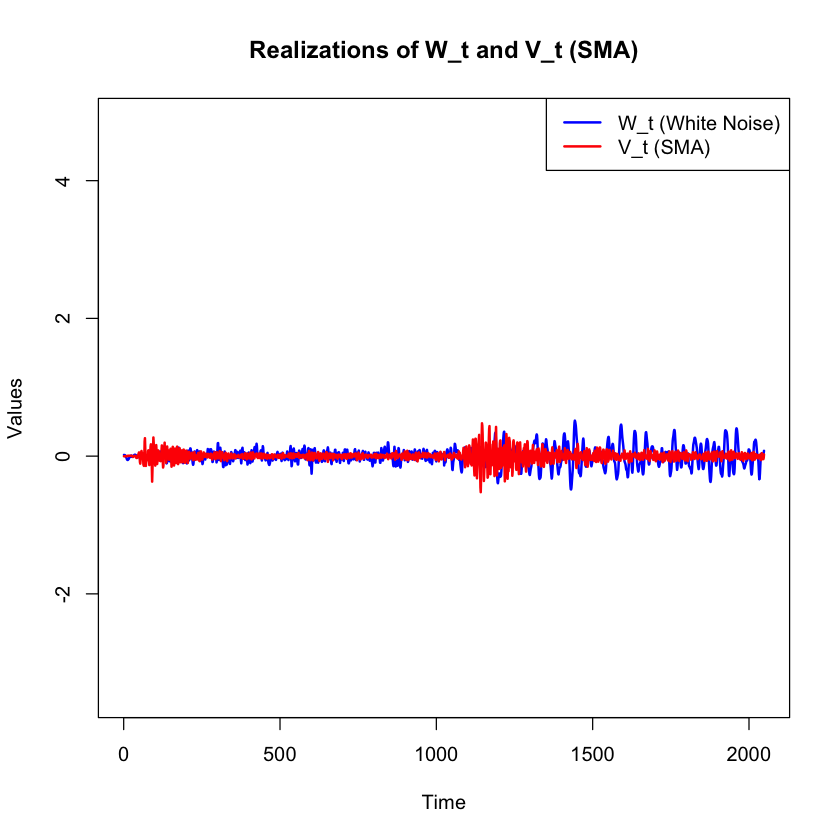

In [48]:
# Plot W_t
plot(EQ5, type = "l", col = "blue", lwd = 2, ylim = range(c(W_t, V_t), na.rm = TRUE),
     ylab = "Values", xlab = "Time", main = "Realizations of W_t and V_t (SMA)")

# Add V_t to the plot
lines(EXP6, col = "red", lwd = 2)

# Add a legend
legend("topright", legend = c("W_t (White Noise)", "V_t (SMA)"), 
       col = c("blue", "red"), lty = 1, lwd = 2)

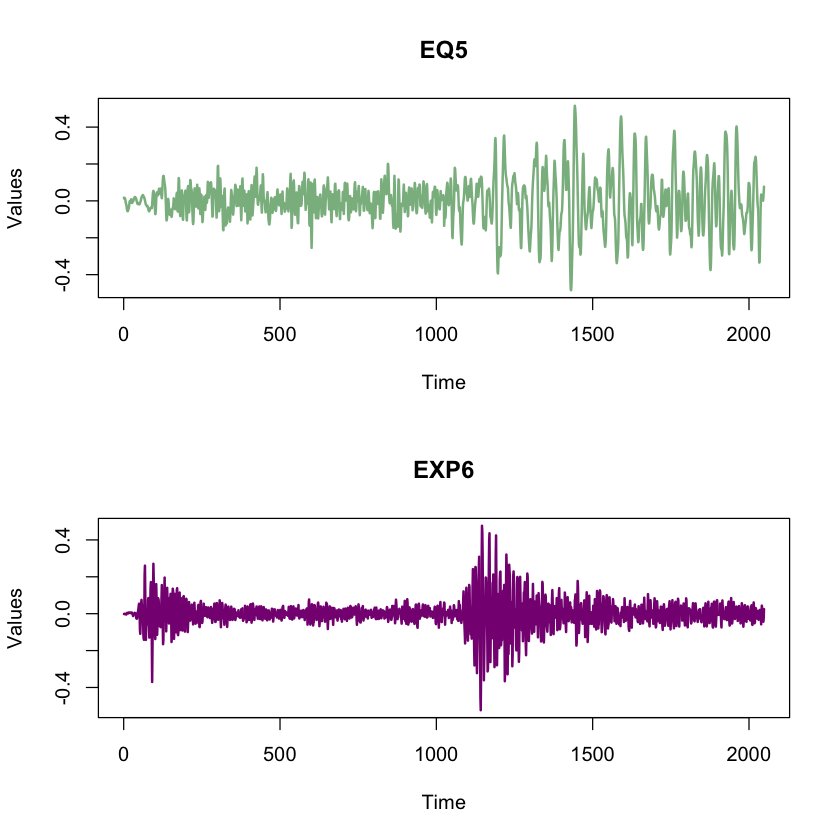

In [49]:
# Set up the plotting area to have 1 row and 2 columns
par(mfrow=c(2,1))

# Plot the first time series W_t
plot(EQ5, type = "l", col = "#8aba8f", lwd = 2, ylab = "Values", xlab = "Time", main = "EQ5")

# Plot the second time series V_t (SMA of W_t)
plot(EXP6, type = "l", col = "#871c82", lwd = 2, ylab = "Values", xlab = "Time", main = "EXP6")


# BÀI 8

In [50]:
pi

[1] 3.141593